# Project 1 - 2025 #


Work in groups of 2-5. Prepare ~10 slides where one slide describes your setup and analysis, main results, challenges/suprises and take-home message.

Everyone should do the first part of the project. You can then choose from one of the three themes for part 2.

You will be working with a subset of the MNIST data set where you can create som new classes for by flipping some numbers, etc.
I provide an example below, but please feel free to use other digits and flips to create a task that is more or less challenging. I have also posted a tab-del file of my generated data. 

All of the project themes aim at you exploring how to make a method "crash" in some way - meaning that you illustrate when a particular method or approach would be a bad choice, or simple a situation when things might not work out as hoped for.

For all tasks, you have to repeat the exercise in order to be able to draw conclusions. That is, one single run of a data analysis task or simulation has very limited information so repeat a few times to ensure you are not drawing conclusions based on a random "fluke".

## Introduction ##


 -9  -2   0   1   2   5   6   8   9 
189 221 349 307 200 186 201 168 179 

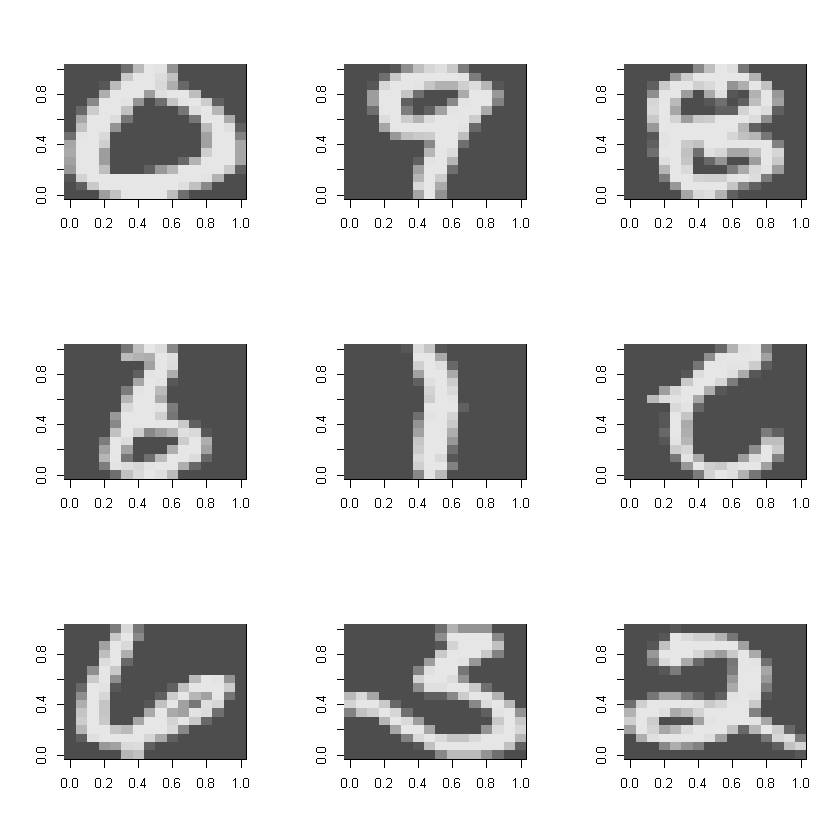

In [45]:
# Exploring the alternate mnist data

library(ElemStatLearn)
library(nsprcomp)

data(zip.train)
set.seed(1000)
Numbers<-zip.train # a subset of the digits
jj<-seq(1,7291)[Numbers[,1]==9]
JJ<-t(apply(Numbers[jj,-1],1,rev)) # turn the 9s upside down
Numbers2<-rbind(Numbers[jj,],cbind(matrix(rep(-9,dim(JJ)[1]),dim(JJ)[1],1),JJ))
jj<-seq(1,7291)[Numbers[,1]==2]
JJ<-t(apply(Numbers[jj,-1],1,rev)) # turn the 2s upside down
Numbers2<-rbind(Numbers2,Numbers[jj,],cbind(matrix(rep(-2,dim(JJ)[1]),dim(JJ)[1],1),JJ))
jj<-seq(1,7291)[Numbers[,1]==5]
Numbers2<-rbind(Numbers2,Numbers[jj,])
jj<-seq(1,7291)[Numbers[,1]==6]
Numbers2<-rbind(Numbers2,Numbers[jj,])
jj<-seq(1,7291)[Numbers[,1]==8]
Numbers2<-rbind(Numbers2,Numbers[jj,])
jj<-seq(1,7291)[Numbers[,1]==0]
Numbers2<-rbind(Numbers2,Numbers[jj,])
jj<-seq(1,7291)[Numbers[,1]==1]
Numbers2<-rbind(Numbers2,Numbers[jj,])
#
ii<-sample(seq(1,dim(Numbers2)[1]),2000) # a subset to use for the project
Numbers<-Numbers2[ii,]
labs<-Numbers[,1]
table(Numbers[,1])

par(mfrow=c(3,3)) # The digits can look quite different - run this a couple of times to see.
labu<-unique(labs)
for (zz in (seq(1,9))) {
  iz<-sample(seq(1,dim(Numbers)[1])[Numbers[,1]==labu[zz]],1)
  image(t(matrix(as.numeric(Numbers[iz,-1]),16,16,byrow=T))[,16:1], col = gray.colors(33))
}



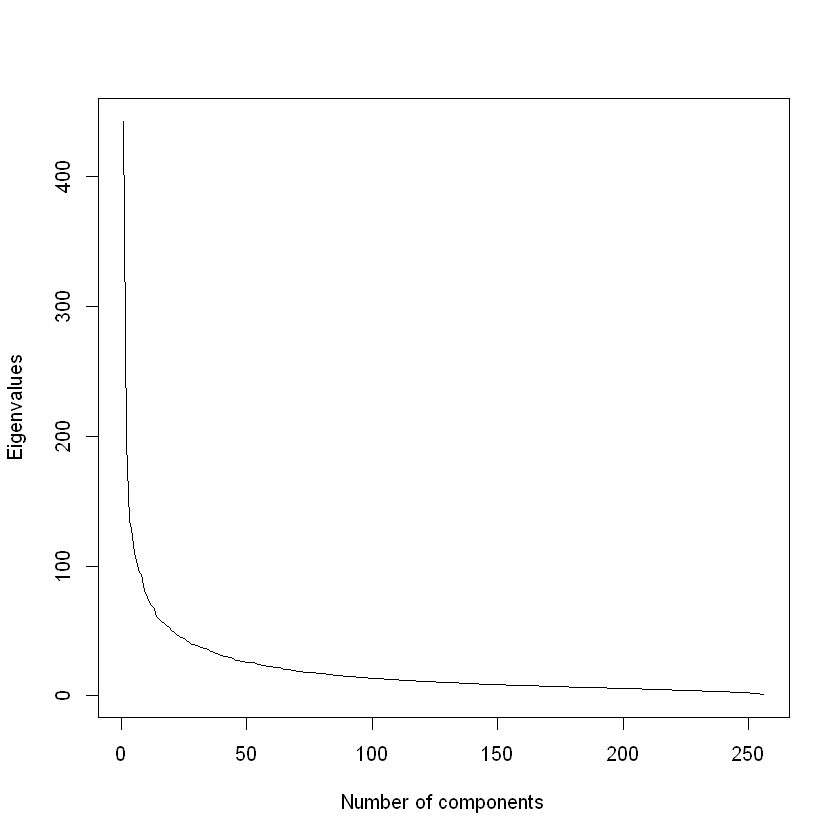

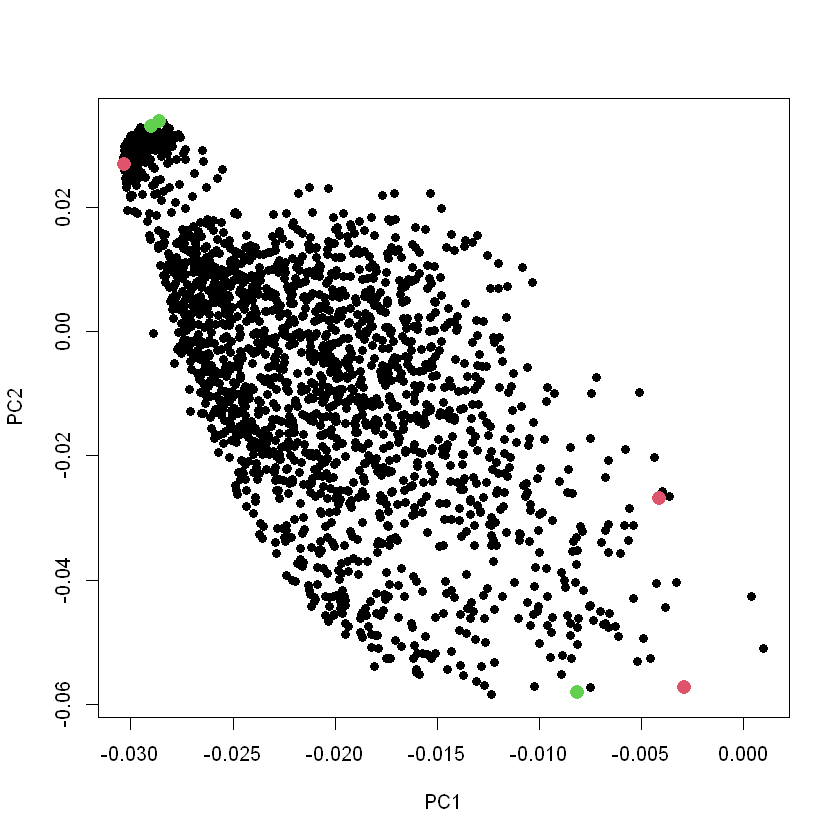

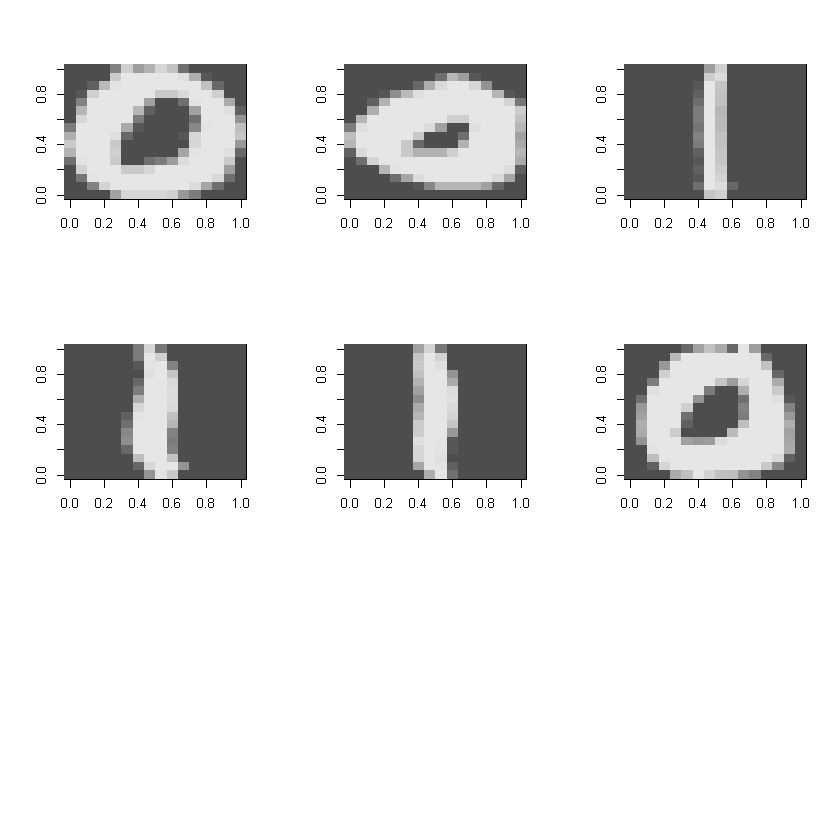

In [46]:
ssn<-svd(Numbers[,-1])
plot(ssn$d,type="l",xlab="Number of components",ylab="Eigenvalues")
# most of variance explained by 50 components (of 256)
plot(ssn$u[,1:2],xlab="PC1",ylab="PC2",pch=16)   # Plotting PC1 vs PC2
#pp<-identify(ssn$u[,1:2]) # use this to mark some of the observations if use in R interactive mode
aa<-rev(sort.list(ssn$u[,1]))
bb<-rev(sort.list(ssn$u[,2]))
au<-c(sample(aa[1:10],2),sample(aa[1990:2000],1))
bu<-c(sample(bb[1:10],2),sample(bb[1990:2000],1)) # Here I just pick some digits at the extremes of pc1 and pc2
points(ssn$u[au,1:2],col=2,pch=16,cex=1.5)       # and highlight them in the scatter plot
points(ssn$u[bu,1:2],col=3,pch=16,cex=1.5)
#
par(mfrow=c(3,3))                                # Plotting the corresponding digits
for (bb in (1:length(au))) {
   image(t(matrix(as.numeric(Numbers[au[bb],-1]),16,16,byrow=T))[,16:1], col = gray.colors(33)) }
for (bb in (1:length(bu))) {
   image(t(matrix(as.numeric(Numbers[bu[bb],-1]),16,16,byrow=T))[,16:1], col = gray.colors(33)) }

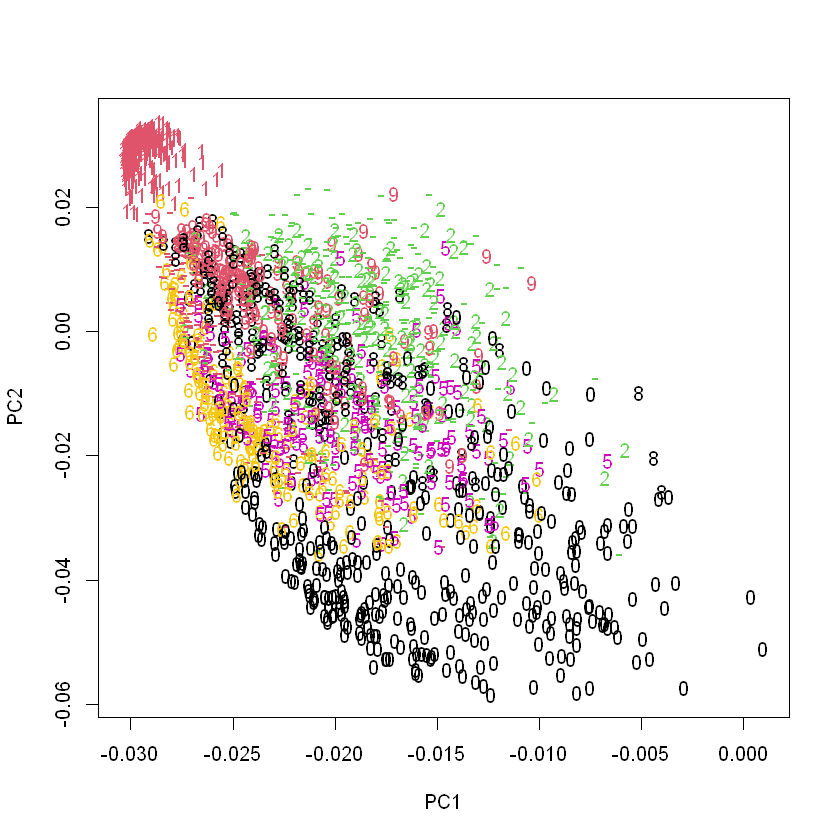

In [48]:
plot(ssn$u[,1:2],xlab="PC1",ylab="PC2",pch=as.character(Numbers[,1]),col=abs(Numbers[,1])+1) # Scatter plot with the labels

The first PCs do a pretty good job separating 0s and 1s from the rest.

With only two components you can still discern the digits. Try with more components to see how much that improves the reconstruction.

Here's a simple example of kNN applied to a training-test split just to get a sense of it. You can see where I picked flips to confuse the models, but the performance is quite good - so going into this we see that it's a relatively easy task (Part 2 of the project will change that!).

In [70]:
ii<-sample(seq(1,2000),1000) # test
data_test <- Numbers[ii,]
data_train <- Numbers[-ii,]
pp <- class::knn(
		as.matrix(data_train[,-1]),   # training data (variables)
		data_test[,-1],               # test data (variables)
		as.integer(data_train[,1]),   # training data (classes)
		k = 5)  
table(pp,data_test[,1])               # confusion matrix

    
pp    -9  -2   0   1   2   5   6   8   9
  -9  89   0   0   0   4   4  20   1   0
  -2   0  86   1   0   1   3   0   1   0
  0    4   2 158   0   5   2   3   4   2
  1    0   3   0 157   6   0   0   1   1
  2    0   2   0   0  82   1   0   0   0
  5    0   0   0   0   0  79   0   0   0
  6    6   2   0   0   1   1  78   1   0
  8    0   5   0   0   3   0   0  76   1
  9    0   1   0   0   3   4   0   2  94

## Part 1 ##

*Everyone should do this task.*

You should explore at least 3 different classifiers of different character, from flexible to rigid (e.g. small k to large k in k-nearest neighbors, logistic regression vs neural networks, RandomForest vs LDA, etc). Feel free to try any other classifier you like as long as you explain if they are flexible or rigid. 


1. **Perform cross-validation to compare the different models without tuning.** 
2. **Perform cross-validation to tune *and* compare the different models - this requires you to use a double-CV or hold-out+CV  as mentioned in class.** 
3. **Demonstrate the *optimism of training* by comparing the difference between training error, cross-validation error after tuning, and test error performance. Discuss the difference for the flexible and rigid classifiers in terms of optimism.** 


You can write this from scratch if you like. Otherwise, in R, there is a package called *caret* (https://topepo.github.io/caret/index.html) that provides the pipeline for doing this (see Chapter 5). There is also a package called *tidymodels* (https://www.tidymodels.org/). Both sites provide tutorials and examples for tuning/comparing models.

In python, SciKit-learn (https://scikit-learn.org/stable/index.html) contains similar workflows, and there is also a python version of *caret* (https://github.com/pycaret/pycaret). 

## Part 2 - Themes

### Theme 1 - Mislabeling 

There is currently quite a lot of active research into noisy data or mislabeled data and how this impacts model training and prediction performance of test data. "Dirty data" with mislabeling can be a result of a cheap data collection strategy that is less precise for example. 

Create a mislabeled data set from the digits data by randomly changing the labels for some of the observations. *Note, you should only create mislabels for your training data - the test data should be clean.* 

Redo Part 1 in this setting. 

Which methods handle the mislabeling OK? which methods struggle?

You should explore at least 3 levels of mislabeling (some modest, some more severe and some really severe cases), i.e. proportion of mislabeled data. *Please note that your test data should be "clean", i.e. without mislabeling. For each simulation run, make sure you create a clean and separate data set to estimate prediction performance.* 

**Compare predictive performance across methods and discuss why one method might perform worse than another.**

* Voluntary - something to think about* 
What happens if there are more mislabeling in one class than another (it's enough if you do this for one level of mislabeling)?

What happens if the probability of mislabeling depends on the underlying features?



### Theme 2 - sample size

Redo Part 1 in a setting where you make the training sample smaller and smaller. 

Which methods performs well on a reduced data set? which methods struggle?

You should explore at least 3 levels of sample sizes.

**Compare predictive performance across methods and discuss why one method might perform worse than another.**

* Voluntary - something to think about* 
What happens if there is an imbalance between the class sizes?


### Theme 3  - noisy features
Many of the pixels are not informative (outer edges of the images for example). 

Add unrelated features to the data set and compare how the methods perform. Use at least 3 levels of additional features. 

Which methods performs well on a data set with noisy features? which methods struggle?

**Compare predictive performance across methods and discuss why one method might perform worse than another.**

* Voluntary - something to think about* 
What happens if you instead remove features? How many pixels do you think suffice to classify the digits (we will explore this in Project 2). 
